# Grass10

Data taken from Teagasc Grass10 newsletters
<https://www.teagasc.ie/crops/grassland/grass10/>

In [1]:
import os
from datetime import datetime, timezone
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
print("Last updated:", datetime.now(tz=timezone.utc))

Last updated: 2022-10-20 14:35:39.012873+00:00


In [3]:
DATA_DIR = os.path.join("data", "grass-growth", "grass10", "grass10.ods")

In [4]:
grass = pd.read_excel(DATA_DIR, parse_dates=["week"])

In [5]:
grass.head()

,week,AFC_dairy,cover_LU_dairy,growth_dairy,demand_dairy,stocking_rate_dairy,pregrazing_yield_dairy,diet_grass_dairy,diet_supplement_dairy,AFC_drystock,...,growth_drystock,stocking_rate_drystock,demand_drystock,days_ahead_drystock,DM_Moorepark,DM_Grange,DM_Ballyhaise,DM_Athenry,DM_Kilworth,DM_Clonakilty
0,2020-01-20,752,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-27,760,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-03,793,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-10,827,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-17,872,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
grass.shape

(114, 21)

In [7]:
# use weekly time series starting on Monday to fill missing rows
grass_ts = pd.DataFrame(
    pd.date_range(
        str(grass["week"][0].year) + "-01-01",
        str(grass["week"][len(grass) - 1].year) + "-12-31",
        freq="W-MON",
    ),
    columns=["week"],
)

In [8]:
grass_ts = pd.merge(grass_ts, grass, how="outer")

In [9]:
grass_ts.head()

,week,AFC_dairy,cover_LU_dairy,growth_dairy,demand_dairy,stocking_rate_dairy,pregrazing_yield_dairy,diet_grass_dairy,diet_supplement_dairy,AFC_drystock,...,growth_drystock,stocking_rate_drystock,demand_drystock,days_ahead_drystock,DM_Moorepark,DM_Grange,DM_Ballyhaise,DM_Athenry,DM_Kilworth,DM_Clonakilty
0,2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-20,752.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-27,760.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-03,793.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
grass_ts.shape

(157, 21)

In [11]:
list(grass_ts)

['week',
 'AFC_dairy',
 'cover_LU_dairy',
 'growth_dairy',
 'demand_dairy',
 'stocking_rate_dairy',
 'pregrazing_yield_dairy',
 'diet_grass_dairy',
 'diet_supplement_dairy',
 'AFC_drystock',
 'pregrazing_yield_drystock',
 'growth_drystock',
 'stocking_rate_drystock',
 'demand_drystock',
 'days_ahead_drystock',
 'DM_Moorepark',
 'DM_Grange',
 'DM_Ballyhaise',
 'DM_Athenry',
 'DM_Kilworth',
 'DM_Clonakilty']

In [12]:
DATA_DIR = os.path.join("data", "grass-growth", "grass10", "grass10.csv")

In [13]:
# save time series
grass_ts.to_csv(DATA_DIR, index=False)

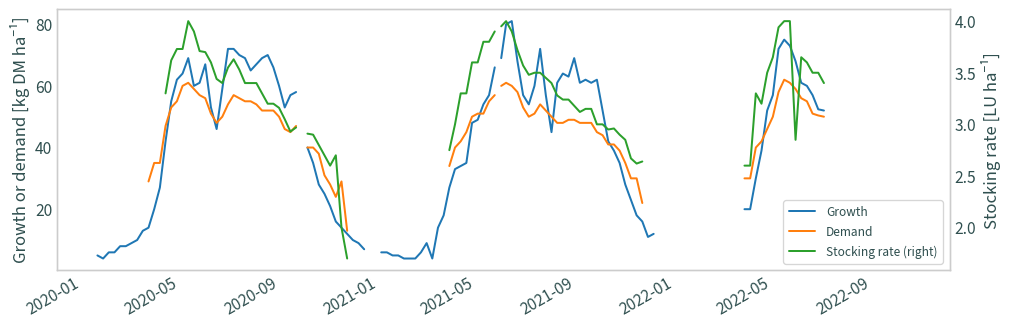

In [14]:
ax = grass_ts.plot(
    "week",
    "growth_dairy",
    figsize=(12, 4),
    ylabel="Growth or demand [kg DM ha⁻¹]",
    label="Growth",
)
grass_ts.plot("week", "demand_dairy", ax=ax, label="Demand")
grass_ts.plot(
    "week",
    "stocking_rate_dairy",
    ax=ax,
    secondary_y=True,
    ylabel="Stocking rate [LU ha⁻¹]",
    label="Stocking rate",
)
ax.set_xlabel("")
plt.show()

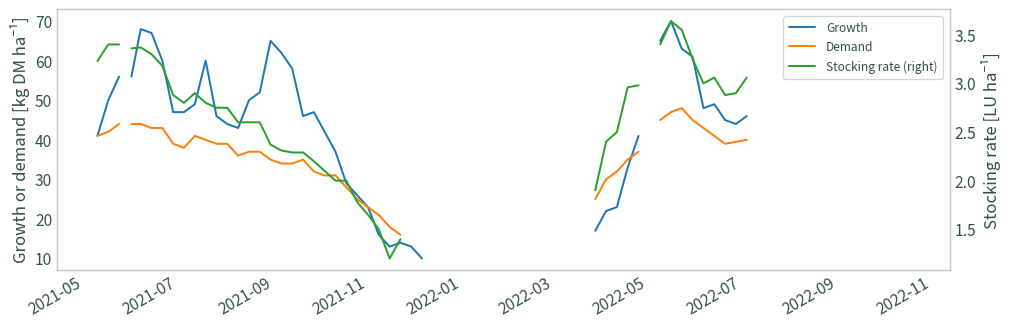

In [15]:
ax = grass_ts.plot(
    "week",
    "growth_drystock",
    figsize=(12, 4),
    ylabel="Growth or demand [kg DM ha⁻¹]",
    label="Growth",
)
grass_ts.plot("week", "demand_drystock", ax=ax, label="Demand")
grass_ts.plot(
    "week",
    "stocking_rate_drystock",
    ax=ax,
    secondary_y=True,
    ylabel="Stocking rate [LU ha⁻¹]",
    label="Stocking rate",
)
ax.set_xlabel("")
plt.show()

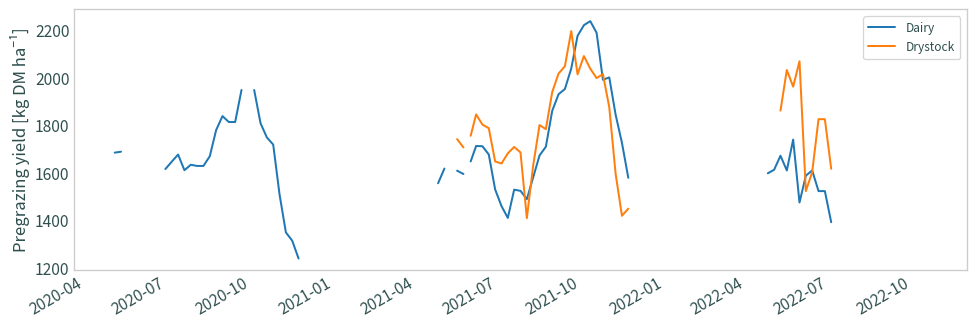

In [16]:
ax = grass_ts.plot(
    "week",
    "pregrazing_yield_dairy",
    figsize=(12, 4),
    ylabel="Pregrazing yield [kg DM ha⁻¹]",
    label="Dairy",
)
grass_ts.plot("week", "pregrazing_yield_drystock", ax=ax, label="Drystock")
ax.set_xlabel("")
plt.show()

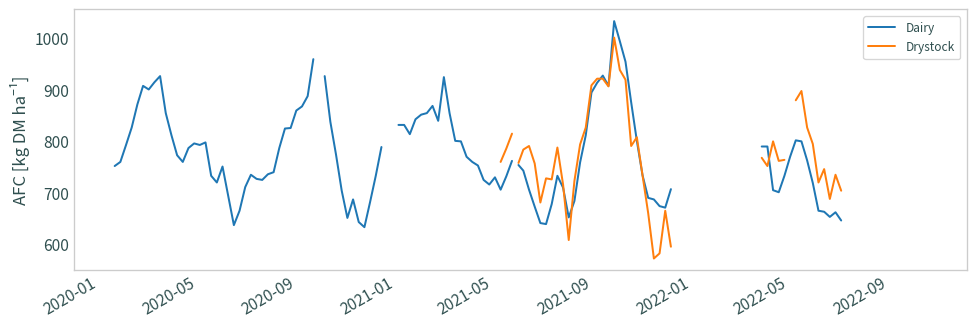

In [17]:
ax = grass_ts.plot(
    "week",
    "AFC_dairy",
    figsize=(12, 4),
    ylabel="AFC [kg DM ha⁻¹]",
    label="Dairy",
)
grass_ts.plot("week", "AFC_drystock", ax=ax, label="Drystock")
ax.set_xlabel("")
plt.show()